In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

### Text Preprocessing

In [2]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocess(text):
    # split into sentences
    sentences = sent_tokenize(text)
    
    # split into words
    tokens = word_tokenize(text)
    
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in words]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

### Import databreaches Excel file

In [3]:
df = pd.read_csv('cleanausdatabreach2018-23.csv', encoding='latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       101 non-null    object 
 1   CountryOfNotification      101 non-null    object 
 2   DataBreachSource           101 non-null    object 
 3   IncidentDescription        16 non-null     object 
 4   NumberOfAusPeopleAffected  42 non-null     object 
 5   IncidentDay                84 non-null     float64
 6   IncidentMonth              99 non-null     float64
 7   IncidentYear               101 non-null    int64  
 8   NotificationDate           101 non-null    object 
 9   NotificationURL            101 non-null    object 
 10  Title                      95 non-null     object 
 11  Channel                    101 non-null    object 
 12  MediaURL                   95 non-null     object 
 13  CompanyDescription         99 non-null     object 

### Drop one record

In [4]:
df[df['Name']=='Department of Foreign Affairs and Trade']

,Name,CountryOfNotification,DataBreachSource,IncidentDescription,NumberOfAusPeopleAffected,IncidentDay,IncidentMonth,IncidentYear,NotificationDate,NotificationURL,...,Apology,Compensation,ResponsiveAction,ValueCommitment,CustomerFocus,OpenDisclosure,CustomerAdvice,ExtraMediaURL1,ExtraMediaURL2,Notes
18,Department of Foreign Affairs and Trade,Australia,Human error,NaN,1000,30.0,9.0,2020,30/09/2020,https://twitter.com/dfat/status/13112581258071...,...,1.0,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN


In [5]:
df.drop(18, inplace=True)

In [6]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       100 non-null    object 
 1   CountryOfNotification      100 non-null    object 
 2   DataBreachSource           100 non-null    object 
 3   IncidentDescription        16 non-null     object 
 4   NumberOfAusPeopleAffected  41 non-null     object 
 5   IncidentDay                83 non-null     float64
 6   IncidentMonth              98 non-null     float64
 7   IncidentYear               100 non-null    int64  
 8   NotificationDate           100 non-null    object 
 9   NotificationURL            100 non-null    object 
 10  Title                      95 non-null     object 
 11  Channel                    100 non-null    object 
 12  MediaURL                   94 non-null     object 
 13  CompanyDescription         99 non-null     object 


In [7]:
df.head()

,Name,CountryOfNotification,DataBreachSource,IncidentDescription,NumberOfAusPeopleAffected,IncidentDay,IncidentMonth,IncidentYear,NotificationDate,NotificationURL,...,Apology,Compensation,ResponsiveAction,ValueCommitment,CustomerFocus,OpenDisclosure,CustomerAdvice,ExtraMediaURL1,ExtraMediaURL2,Notes
0,PageUp People,Australia,Malicious or criminal attack,NaN,NaN,23.0,5.0,2018,05/06/2018,https://web.archive.org/web/20190813054217/htt...,...,5.0,NaN,3.0,1.0,NaN,NaN,4.0,NaN,NaN,Different types of data compromised by employe...
1,Canva,Australia,Malicious or criminal attack,NaN,139000000,24.0,5.0,2019,01/06/2019,https://www.canva.com/help/incident-may24/,...,7.0,6.0,2.0,4.0,8.0,3.0,5.0,NaN,NaN,NaN
2,Australian National University,Australia,Malicious or criminal attack,NaN,NaN,NaN,11.0,2018,04/06/2019,https://www.anu.edu.au/news/all-news/message-f...,...,1.0,NaN,3.0,5.0,NaN,4.0,6.0,NaN,NaN,NaN
3,Australian Catholic University,Australia,Malicious or criminal attack,NaN,NaN,22.0,5.0,2019,17/06/2019,https://www.acu.edu.au/about-acu/news/2019/jun...,...,2.0,NaN,4.0,6.0,NaN,3.0,5.0,NaN,NaN,NaN
4,NAB,Australia,Human error,NaN,13000,24.0,7.0,2019,26/07/2019,https://news.nab.com.au/news/nab-apologises-to...,...,5.0,7.0,2.0,4.0,6.0,3.0,8.0,NaN,NaN,NaN


In [8]:
df.tail()

,Name,CountryOfNotification,DataBreachSource,IncidentDescription,NumberOfAusPeopleAffected,IncidentDay,IncidentMonth,IncidentYear,NotificationDate,NotificationURL,...,Apology,Compensation,ResponsiveAction,ValueCommitment,CustomerFocus,OpenDisclosure,CustomerAdvice,ExtraMediaURL1,ExtraMediaURL2,Notes
95,ProctorU,Global,Malicious or criminal attack,NaN,NaN,27.0,7.0,2020,07/08/2020,https://web.archive.org/web/20200807192353/htt...,...,NaN,NaN,3.0,4.0,NaN,NaN,NaN,http://honisoit.com/2020/08/hackers-publish-au...,https://www.proctoru.com/security-update,Media reports impacts on Australian universities
96,City of Port Phillip council,Australia,Human error,Personal information was accidently disclosed ...,NaN,NaN,3.0,2020,28/10/2020,https://web.archive.org/web/20201124124412/htt...,...,4.0,NaN,3.0,5.0,NaN,2.0,6.0,NaN,NaN,NaN
97,RCR Tomlinson,Australia,Malicious or criminal attack,NaN,NaN,17.0,5.0,2018,04/07/2018,https://web.archive.org.au/awa/20190509041051m...,...,5.0,7.0,3.0,1.0,9.0,8.0,6.0,NaN,NaN,NaN
98,Aristocrat,Australia,Malicious or criminal attack,hacker exploited a newly identified (zero day)...,NaN,1.0,6.0,2023,04/08/2023,https://www.aristocrat.com/statement-on-cyber-...,...,NaN,4.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
99,Appen,Australia,Malicious or criminal attack,Malicious actors hacked the systems of the thi...,NaN,NaN,7.0,2020,30/07/2020,https://yourir.info/resources/396cdf0a32f7cb50...,...,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


### EDA

In [9]:
#function to display values on barcharts
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height(), fontsize=14)
                ax.text(_x, _y, value, ha="center", fontsize=12) 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.1)
                value = '{:.0f}'.format(p.get_width(), fontsize=14)
                ax.text(_x, _y, value, ha="left", fontsize=12)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

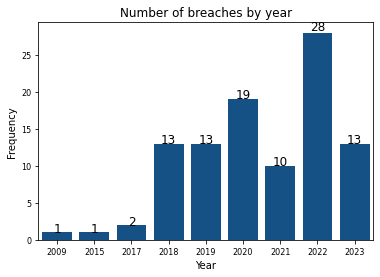

In [10]:
import seaborn as sns

# Calculate value counts
value_counts = df['IncidentYear'].value_counts().sort_index()

# Create bar plot
p = sns.barplot(x=value_counts.index, y=value_counts.values, color='#035397')
show_values(p)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Number of breaches by year')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

### Percentages of each characteristics

In [11]:
df['DetailedExplanation'].notna().value_counts().sort_index()

False     4
True     96
Name: DetailedExplanation, dtype: int64

In [12]:
df['Whitewashing'].notna().value_counts(normalize=True).sort_index()[1]

0.48

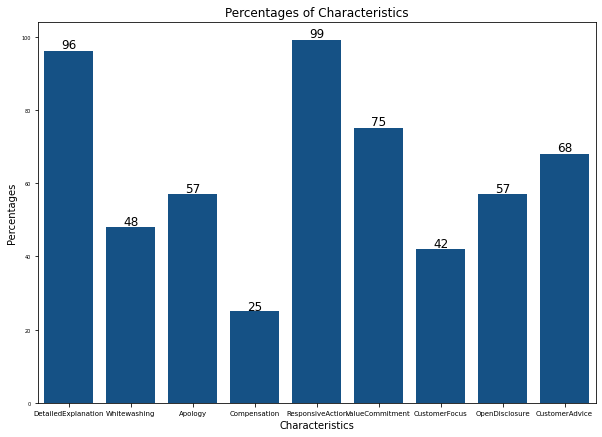

In [13]:
boolean_col = ['DetailedExplanation', 'Whitewashing', 'Apology', 
               'Compensation', 'ResponsiveAction', 'ValueCommitment',
                'CustomerFocus', 'OpenDisclosure', 'CustomerAdvice']

values = []
for col in boolean_col:
    pct = df[col].notna().value_counts(normalize=True).sort_index()[1] * 100
    values.append(pct)
    
# Create bar plot
plt.figure(figsize=(10,7))
p = sns.barplot(x=boolean_col, y=values, color='#035397')
show_values(p)
plt.xlabel('Characteristics')
plt.ylabel('Percentages')
plt.title('Percentages of Characteristics')
plt.xticks(fontsize=7)
plt.yticks(fontsize=5)
plt.show()

Summary: eg. 95% of statements has Detailed Explanation, while only 25% of statements offer compensation.

### Percentages of each characteristics by order

In [14]:
df['DetailedExplanation'].value_counts(normalize=True, dropna=False).sort_index() * 100

1.0    78.0
2.0    12.0
3.0     3.0
4.0     3.0
NaN     4.0
Name: DetailedExplanation, dtype: float64

96 statements or around 95% of statements mentioned DetailedExplanation. Among those, DetailedExplanation appear first in 77% of statements 

In [15]:
df['Whitewashing'].value_counts(normalize=True, dropna=False).sort_index() * 100

1.0     4.0
2.0     9.0
3.0     9.0
4.0    14.0
5.0     7.0
6.0     4.0
7.0     1.0
NaN    52.0
Name: Whitewashing, dtype: float64

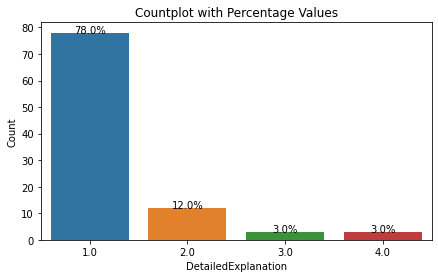

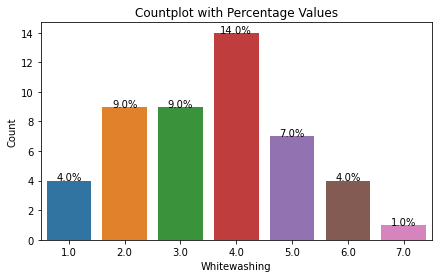

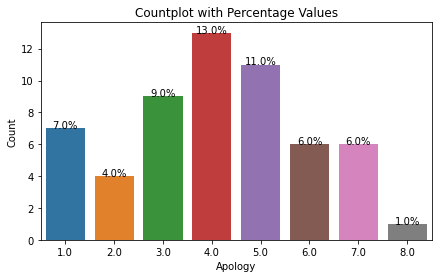

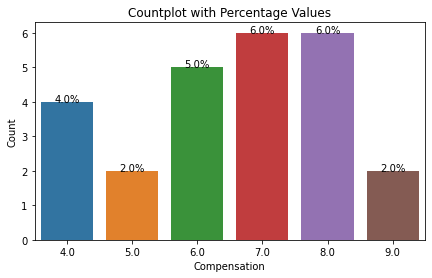

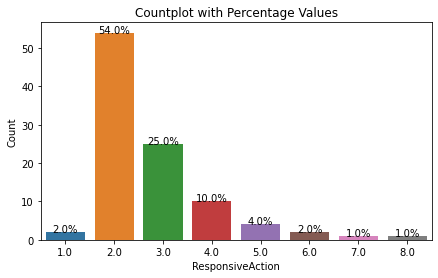

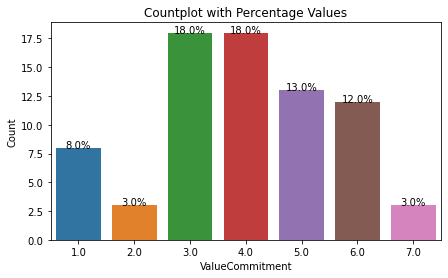

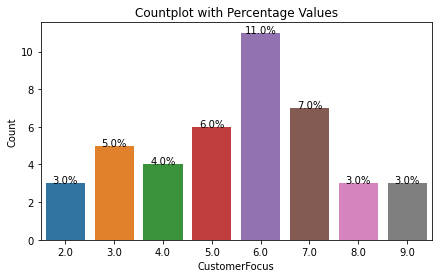

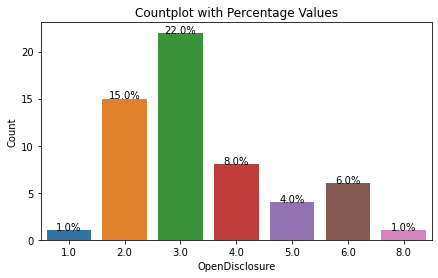

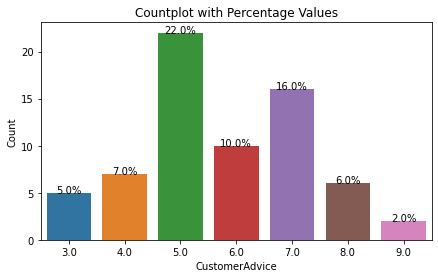

In [16]:
for col in boolean_col:

    # 3. Create a countplot
    plt.figure(figsize=(7, 4))

    # 4. Calculate percentage values for each category
    total_count = len(df)
    ax = sns.countplot(x=col, data=df)

    # 5. Annotate the plot with percentage values
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height/total_count:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center')

    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Countplot with Percentage Values')
    plt.show()

### Count of each characteristics by order

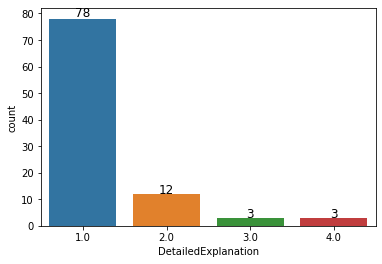

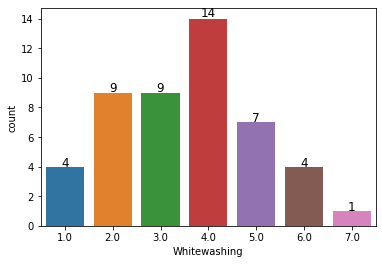

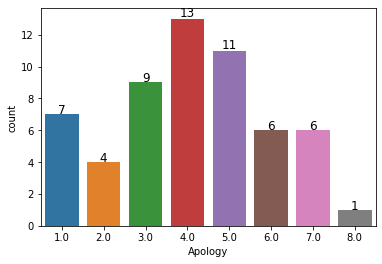

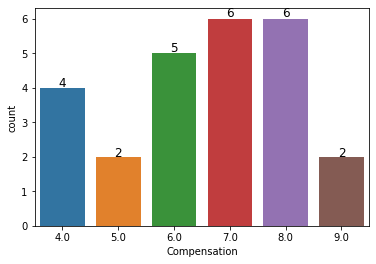

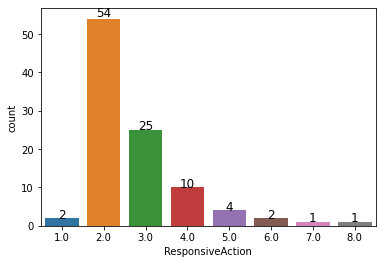

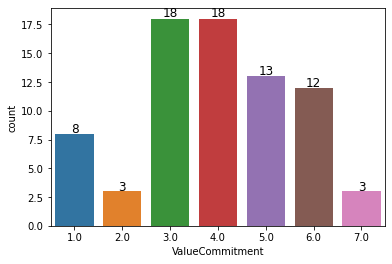

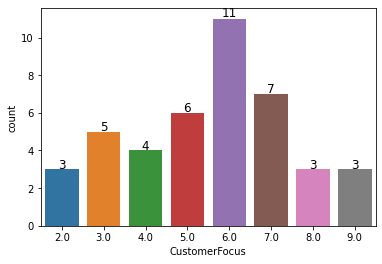

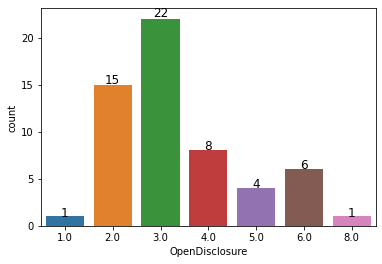

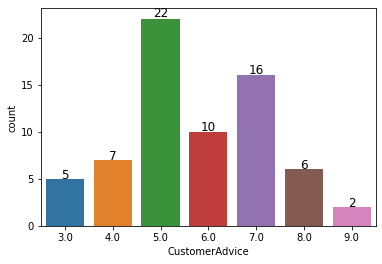

In [17]:
# Create bar plot for each characteristic
for col in boolean_col:
    p = sns.countplot(data=df, x=col)
    show_values(p)
    plt.show()

There are 22 statements with Customer Advice provided in the 5th order of the statement.

In [18]:
df['Whitewashing'].notna().value_counts()

False    52
True     48
Name: Whitewashing, dtype: int64

In [19]:
df['Whitewashing'][2]

7.0

In [20]:
np.isnan(df['Whitewashing'][2]) # False: Has a value, True: Doesn't have a value

False

### Response Grouping

In [21]:
# FullTransparency
def type1(row):
    
    if (np.isnan(row['DetailedExplanation']) == False) & (np.isnan(row['Whitewashing']) == True) & (np.isnan(row['ResponsiveAction']) == False) & (np.isnan(row['ValueCommitment']) == False) & (np.isnan(row['OpenDisclosure']) == False):
        return 1
    else:
        return 0

# Apply the custom function to create a new column
df['FullTransparency'] = df.apply(type1, axis=1)

In [22]:
df.head()

,Name,CountryOfNotification,DataBreachSource,IncidentDescription,NumberOfAusPeopleAffected,IncidentDay,IncidentMonth,IncidentYear,NotificationDate,NotificationURL,...,Compensation,ResponsiveAction,ValueCommitment,CustomerFocus,OpenDisclosure,CustomerAdvice,ExtraMediaURL1,ExtraMediaURL2,Notes,FullTransparency
0,PageUp People,Australia,Malicious or criminal attack,NaN,NaN,23.0,5.0,2018,05/06/2018,https://web.archive.org/web/20190813054217/htt...,...,NaN,3.0,1.0,NaN,NaN,4.0,NaN,NaN,Different types of data compromised by employe...,0
1,Canva,Australia,Malicious or criminal attack,NaN,139000000,24.0,5.0,2019,01/06/2019,https://www.canva.com/help/incident-may24/,...,6.0,2.0,4.0,8.0,3.0,5.0,NaN,NaN,NaN,1
2,Australian National University,Australia,Malicious or criminal attack,NaN,NaN,NaN,11.0,2018,04/06/2019,https://www.anu.edu.au/news/all-news/message-f...,...,NaN,3.0,5.0,NaN,4.0,6.0,NaN,NaN,NaN,0
3,Australian Catholic University,Australia,Malicious or criminal attack,NaN,NaN,22.0,5.0,2019,17/06/2019,https://www.acu.edu.au/about-acu/news/2019/jun...,...,NaN,4.0,6.0,NaN,3.0,5.0,NaN,NaN,NaN,1
4,NAB,Australia,Human error,NaN,13000,24.0,7.0,2019,26/07/2019,https://news.nab.com.au/news/nab-apologises-to...,...,7.0,2.0,4.0,6.0,3.0,8.0,NaN,NaN,NaN,1


In [23]:
# df[df['FullTransparency']==1].iloc[:,7:-1]

In [24]:
# 0 True, 1 False
# Guarded
def type2(row):
    
    if (np.isnan(row['DetailedExplanation']) == True) & (np.isnan(row['Whitewashing']) == False) & (np.isnan(row['ResponsiveAction']) == False) & (np.isnan(row['ValueCommitment']) == False)  & (np.isnan(row['OpenDisclosure']) == True):
        return 1
    else:
        return 0

# Apply the custom function to create a new column
df['Guarded'] = df.apply(type2, axis=1)

In [25]:
# Opacity
def type3(row):
    
    if (np.isnan(row['DetailedExplanation']) == True) & (np.isnan(row['Whitewashing']) == False) & (np.isnan(row['ResponsiveAction']) == False) & (np.isnan(row['ValueCommitment']) == True)  & (np.isnan(row['OpenDisclosure']) == True):
        return 1
    else:
        return 0

# Apply the custom function to create a new column
df['Opacity'] = df.apply(type3, axis=1)

In [26]:
# CustomerInterest
def type4(row):
    
    if (np.isnan(row['Apology']) == False) & (np.isnan(row['Compensation']) == False) & (np.isnan(row['CustomerFocus']) == False) & (np.isnan(row['CustomerAdvice']) == False):
        return 1
    else:
        return 0

# Apply the custom function to create a new column
df['CustomerInterest'] = df.apply(type4, axis=1)

In [27]:
# CustomerInterest
def type5(row):
    
    if (np.isnan(row['Apology']) == False) & (np.isnan(row['Compensation']) == True):
        return 1
    else:
        return 0

# Apply the custom function to create a new column
df['BalancedInterest'] = df.apply(type5, axis=1)

In [28]:
# CustomerInterest
def type6(row):
    
    if (np.isnan(row['Apology']) == True) & (np.isnan(row['Compensation']) == True) & (np.isnan(row['CustomerFocus']) == True) & (np.isnan(row['CustomerAdvice']) == True):
        return 1
    else:
        return 0

# Apply the custom function to create a new column
df['CompanyInterest'] = df.apply(type6, axis=1)

In [29]:
df.iloc[:5,-6:]

,FullTransparency,Guarded,Opacity,CustomerInterest,BalancedInterest,CompanyInterest
0,0,0,0,0,1,0
1,1,0,0,1,0,0
2,0,0,0,0,1,0
3,1,0,0,0,1,0
4,1,0,0,1,0,0


### Percentages of each response types

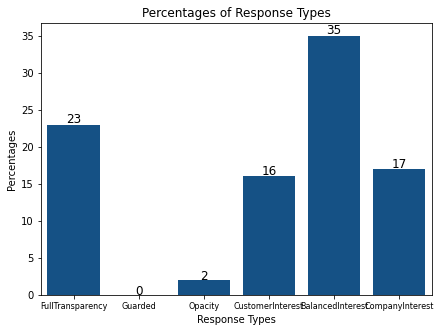

In [30]:
response_col = ['FullTransparency', 'Guarded', 'Opacity', 
               'CustomerInterest', 'BalancedInterest', 'CompanyInterest']

values_pct = []
for col in response_col:
    # If there is only one value 
    if len(df[col].value_counts(normalize=True)) == 1:
        values_pct.append(0)
        
    else:
        pct = df[col].value_counts(normalize=True)[1]*100
        
        values_pct.append(pct)
    
# Create bar plot

plt.figure(figsize=(7,5))
p = sns.barplot(x=response_col, y=values_pct, color='#035397')
show_values(p)
plt.xlabel('Response Types')
plt.ylabel('Percentages')
plt.title('Percentages of Response Types')
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.show()

In [31]:
df['BalancedInterest'].value_counts(normalize=True)[1]*100

35.0

### Creating the label

In [32]:
df[response_col]

,FullTransparency,Guarded,Opacity,CustomerInterest,BalancedInterest,CompanyInterest
0,0,0,0,0,1,0
1,1,0,0,1,0,0
2,0,0,0,0,1,0
3,1,0,0,0,1,0
4,1,0,0,1,0,0
...,...,...,...,...,...,...
95,0,0,0,0,0,1
96,1,0,0,0,1,0
97,0,0,0,1,0,0
98,0,0,0,0,0,0


In [33]:
# Use np.where to check conditions and assign values
df['LevelOfDetail'] = np.where(df['FullTransparency'] == 1, 1,
               np.where(df['Guarded'] == 1, 2,
                 np.where(df['Opacity'] == 1, 3, 0)))

In [34]:
df['LevelOfDetail'].value_counts()

0    75
1    23
3     2
Name: LevelOfDetail, dtype: int64

In [35]:
df[df['Opacity'] == 1]

,Name,CountryOfNotification,DataBreachSource,IncidentDescription,NumberOfAusPeopleAffected,IncidentDay,IncidentMonth,IncidentYear,NotificationDate,NotificationURL,...,ExtraMediaURL1,ExtraMediaURL2,Notes,FullTransparency,Guarded,Opacity,CustomerInterest,BalancedInterest,CompanyInterest,LevelOfDetail
20,Nitro Software,Australia,Malicious or criminal attack,NaN,NaN,30.0,9.0,2020,21/10/2020,https://ir.gonitro.com/Investor-Centre/?page=a...,...,https://www.gonitro.com/security/updates#secur...,NaN,"Notable case: ASX annoucenment lacks details, ...",0,0,1,0,0,1,3
83,Austal,Australia,Malicious or criminal attack,NaN,NaN,1.0,11.0,2018,01/11/2018,https://announcements.asx.com.au/asxpdf/201811...,...,NaN,NaN,NaN,0,0,1,0,0,1,3


In [36]:
# Use np.where to check conditions and assign values
df['BenefitParty'] = np.where(df['CustomerInterest'] == 1, 1,
               np.where(df['BalancedInterest'] == 1, 2,
                 np.where(df['CompanyInterest'] == 1, 3, 0)))

In [37]:
df['BenefitParty'].value_counts()

2    35
0    32
3    17
1    16
Name: BenefitParty, dtype: int64

In [38]:
df[['Name', 'LevelOfDetail','BenefitParty']]

,Name,LevelOfDetail,BenefitParty
0,PageUp People,0,2
1,Canva,1,1
2,Australian National University,0,2
3,Australian Catholic University,1,2
4,NAB,1,1
...,...,...,...
95,ProctorU,0,3
96,City of Port Phillip council,1,2
97,RCR Tomlinson,0,1
98,Aristocrat,0,0


### Check distinct combinations of notification types 

In [39]:
from itertools import product

# Find different combinations of 'Column1' and 'Column2' values
combinations = list(product(df['LevelOfDetail'], df['BenefitParty']))

# print(combinations)
# Convert the list of tuples into a set to remove duplicates
distinct_tuples = set(combinations)

# If you need the distinct tuples back in a list format, you can convert them back to a list
distinct_tuples_list = list(distinct_tuples)

# Print the distinct tuples
print("Distinct Tuples:")
for tuple_value in distinct_tuples_list:
    print(tuple_value)

Distinct Tuples:
(0, 1)
(1, 2)
(0, 0)
(3, 1)
(1, 1)
(0, 3)
(3, 0)
(0, 2)
(3, 3)
(1, 0)
(3, 2)
(1, 3)


There are twelve combinations of responses classes. 

In [40]:
# Convert the list of lists into a set to remove duplicates
# Convert the list of lists into a set of tuples
distinct_set = {tuple(sorted(lst)) for lst in distinct_tuples_list}

# If you need the distinct lists back in a list format, you can convert them back to a list
distinct_list = [list(tpl) for tpl in distinct_set]

distinct_list

[[0, 1], [1, 2], [0, 0], [1, 1], [0, 3], [2, 3], [0, 2], [3, 3], [1, 3]]

There are nine distinct combinations of responses classes (without duplicates).

### Bigrams for titles

In [41]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [42]:
# Ref: https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

# Lemmatize with POS Tag
from nltk.corpus import wordnet
# nltk.download('averaged_perceptron_tagger')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [43]:
def preprocess(text):
    try: 
        # split into sentences
        sentences = sent_tokenize(text)

        # split into words
        tokens = word_tokenize(text)

        # convert to lower case
        tokens = [w.lower() for w in tokens]

        # remove punctuation from each word
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]

        # remove remaining tokens that are not alphabetic
        words = [word for word in stripped if word.isalpha()]

        # filter out stop words
        stop_words = set(stopwords.words('english'))
        words = [w for w in words if not w in stop_words]

        # Lemmatise the tokens
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]

        # Join the tokens back into a string
        processed_text = ' '.join(lemmatized_tokens)
        return processed_text
    except TypeError:
        return ""

In [44]:
df['Title_nltk'] = df['Title'].apply(lambda x: preprocess(x))

In [45]:
df['Title_nltk'].head()

0           unauthorised activity system
1        canva security incident may faq
2                 message vicechancellor
3                cyber attack acu system
4    nab apologises customer data breach
Name: Title_nltk, dtype: object

In [46]:
from nltk.util import ngrams

def bigrams_convert(column, n=2):
    df['bigrams'+'_'+column]=df[column].apply(lambda sentence: list(ngrams(sentence.split(), n)))
    
def trigrams_convert(column, n=3):
    df['trigrams'+'_'+column]=df[column].apply(lambda sentence: list(ngrams(sentence.split(), n)))

In [47]:
bigrams_convert('Title_nltk')
trigrams_convert('Title_nltk')

In [48]:
df.head()

,Name,CountryOfNotification,DataBreachSource,IncidentDescription,NumberOfAusPeopleAffected,IncidentDay,IncidentMonth,IncidentYear,NotificationDate,NotificationURL,...,Guarded,Opacity,CustomerInterest,BalancedInterest,CompanyInterest,LevelOfDetail,BenefitParty,Title_nltk,bigrams_Title_nltk,trigrams_Title_nltk
0,PageUp People,Australia,Malicious or criminal attack,NaN,NaN,23.0,5.0,2018,05/06/2018,https://web.archive.org/web/20190813054217/htt...,...,0,0,0,1,0,0,2,unauthorised activity system,"[(unauthorised, activity), (activity, system)]","[(unauthorised, activity, system)]"
1,Canva,Australia,Malicious or criminal attack,NaN,139000000,24.0,5.0,2019,01/06/2019,https://www.canva.com/help/incident-may24/,...,0,0,1,0,0,1,1,canva security incident may faq,"[(canva, security), (security, incident), (inc...","[(canva, security, incident), (security, incid..."
2,Australian National University,Australia,Malicious or criminal attack,NaN,NaN,NaN,11.0,2018,04/06/2019,https://www.anu.edu.au/news/all-news/message-f...,...,0,0,0,1,0,0,2,message vicechancellor,"[(message, vicechancellor)]",[]
3,Australian Catholic University,Australia,Malicious or criminal attack,NaN,NaN,22.0,5.0,2019,17/06/2019,https://www.acu.edu.au/about-acu/news/2019/jun...,...,0,0,0,1,0,1,2,cyber attack acu system,"[(cyber, attack), (attack, acu), (acu, system)]","[(cyber, attack, acu), (attack, acu, system)]"
4,NAB,Australia,Human error,NaN,13000,24.0,7.0,2019,26/07/2019,https://news.nab.com.au/news/nab-apologises-to...,...,0,0,1,0,0,1,1,nab apologises customer data breach,"[(nab, apologises), (apologises, customer), (c...","[(nab, apologises, customer), (apologises, cus..."


In [49]:
from collections import Counter

bigrams = []
for row in df['bigrams_Title_nltk']:
    bigrams.extend(row)
    
print(f'Count of bigrams: {len(bigrams)}')
print("\n")
    
# Count the frequency of each bigram
bigram_frequency = Counter(bigrams)

# Print the frequency of each bigram
# for bigram, frequency in bigram_frequency.items():
#     print(bigram, frequency)
    
# Organize elements by frequency using most_common()
bigrams_organized_by_frequency = bigram_frequency.most_common()

# Print the elements organized by frequency
for element, frequency in bigrams_organized_by_frequency:
    print(element, frequency)

Count of bigrams: 325


('data', 'breach') 18
('security', 'incident') 11
('cyber', 'incident') 11
('cyber', 'security') 5
('breach', 'notification') 4
('unauthorised', 'activity') 3
('cyber', 'attack') 3
('personal', 'information') 3
('privacy', 'breach') 3
('data', 'incident') 3
('incident', 'update') 2
('data', 'security') 2
('privacy', 'incident') 2
('important', 'information') 2
('breach', 'personal') 2
('customer', 'information') 2
('medium', 'statement') 2
('unauthorised', 'access') 2
('cybersecurity', 'incident') 2
('security', 'update') 2
('activity', 'system') 1
('canva', 'security') 1
('incident', 'may') 1
('may', 'faq') 1
('message', 'vicechancellor') 1
('attack', 'acu') 1
('acu', 'system') 1
('nab', 'apologises') 1
('apologises', 'customer') 1
('customer', 'data') 1
('important', 'update') 1
('update', 'personal') 1
('statement', 'ceo') 1
('ceo', 'information') 1
('information', 'breach') 1
('perth', 'mint') 1
('mint', 'experience') 1
('experience', 'data') 1
('henning', '

Bigram: data breach - Frequency: 18
Bigram: security incident - Frequency: 11
Bigram: cyber incident - Frequency: 11
Bigram: cyber security - Frequency: 5
Bigram: breach notification - Frequency: 4


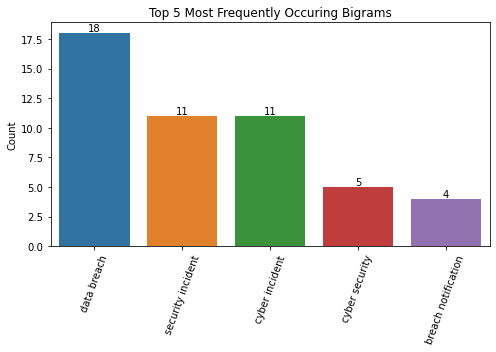

In [50]:
import seaborn as sns

bigrams_organized_by_frequency_10 = bigram_frequency.most_common(5)

# Print the elements organized by frequency
# print('Top 10 trigrams')
bi = []
freq = []

for element, frequency in bigrams_organized_by_frequency_10:
    bigram = ' '.join(element)
    print(f'Bigram: {bigram} - Frequency: {frequency}')
    bi.append(bigram)
    freq.append(frequency)


df_bi = pd.DataFrame({'Bigram': bi, 'Count': freq})

plt.figure(figsize=(7, 5))
ax = sns.barplot(x=df_bi['Bigram'].values, y=df_bi['Count'].values)

# Display the count on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.ylabel('Count')
plt.title('Top 5 Most Frequently Occuring Bigrams')

plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

### Trigrams for titles

In [51]:
trigrams = []
for row in df['trigrams_Title_nltk']:
    trigrams.extend(row)
    
print(f'Count of trigrams: {len(trigrams)}')
print("\n")
    
# Count the frequency of each trigram
trigram_frequency = Counter(trigrams)

# Organize elements by frequency using most_common()
trigrams_organized_by_frequency = trigram_frequency.most_common()

# Print the elements organized by frequency
for element, frequency in trigrams_organized_by_frequency:
    print(element, frequency)

Count of trigrams: 230


('data', 'breach', 'notification') 4
('cyber', 'security', 'incident') 4
('data', 'security', 'incident') 2
('unauthorised', 'activity', 'system') 1
('canva', 'security', 'incident') 1
('security', 'incident', 'may') 1
('incident', 'may', 'faq') 1
('cyber', 'attack', 'acu') 1
('attack', 'acu', 'system') 1
('nab', 'apologises', 'customer') 1
('apologises', 'customer', 'data') 1
('customer', 'data', 'breach') 1
('important', 'update', 'personal') 1
('update', 'personal', 'information') 1
('statement', 'ceo', 'information') 1
('ceo', 'information', 'breach') 1
('perth', 'mint', 'experience') 1
('mint', 'experience', 'data') 1
('experience', 'data', 'breach') 1
('henning', 'harders', 'client') 1
('harders', 'client', 'information') 1
('toll', 'system', 'update') 1
('service', 'nsw', 'cyber') 1
('nsw', 'cyber', 'incident') 1
('lion', 'cyber', 'incident') 1
('cyber', 'incident', 'update') 1
('clarification', 'report', 'data') 1
('report', 'data', 'breach') 1
('regis'

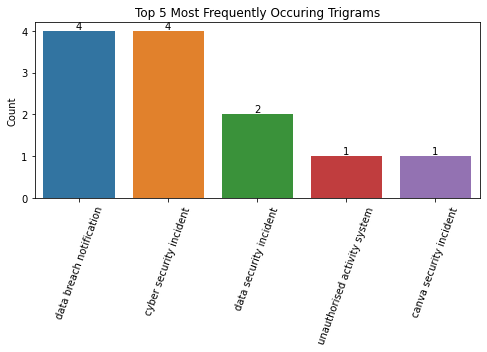

In [52]:
trigrams_organized_by_frequency_10 = trigram_frequency.most_common(5)

# Print the elements organized by frequency
# print('Top 10 trigrams')
tri = []
freq = []

for element, frequency in trigrams_organized_by_frequency_10:
    trigram = ' '.join(element)
#     print(f'Trigram: {trigram} - Frequency: {frequency}')
    tri.append(trigram)
    freq.append(frequency)
    
df_tri = pd.DataFrame({'Trigram': tri, 'Count': freq})

plt.figure(figsize=(7, 5))
ax = sns.barplot(x=df_tri['Trigram'].values, y=df_tri['Count'].values)

# Display the count on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.ylabel('Count')
plt.title('Top 5 Most Frequently Occuring Trigrams')

plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

### Author

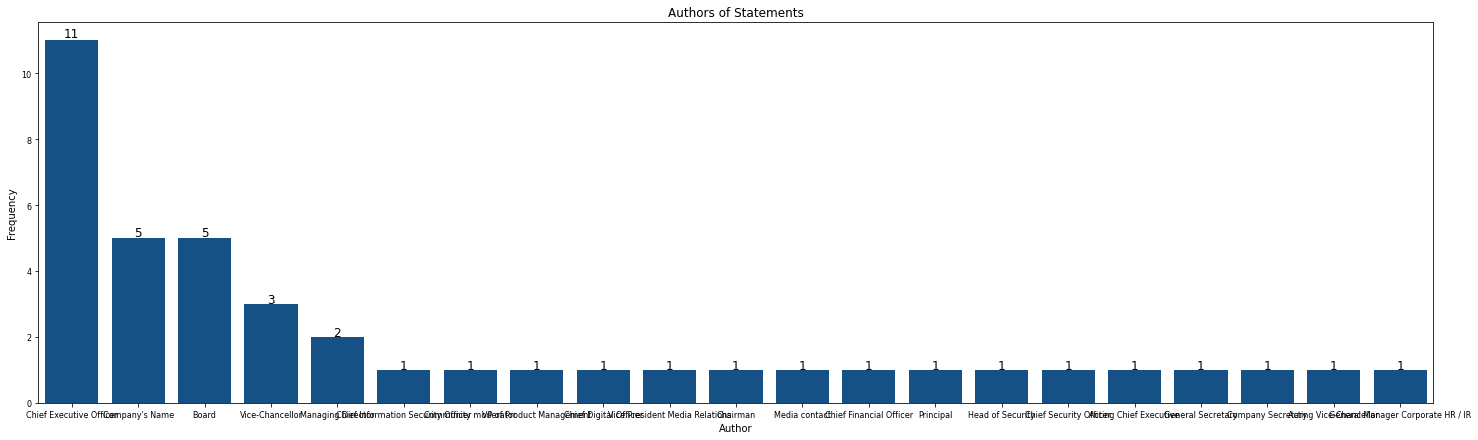

In [53]:
# Calculate value counts
value_counts = df['Author'].value_counts(dropna=False)

import warnings
# Ignore the specific warning
warnings.filterwarnings("ignore", category=RuntimeWarning, message="Glyph 150 missing from current font.")

# Create bar plot
plt.figure(figsize=(25, 7))
p = sns.barplot(x=value_counts.index, y=value_counts.values, color='#035397')
show_values(p)
plt.xlabel('Author')
plt.ylabel('Frequency')
plt.title('Authors of Statements')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [54]:
df['Author'].value_counts(dropna=False)

NaN                                   58
Chief Executive Officer               11
Company's Name                         5
Board                                  5
Vice-Chancellor                        3
Managing Director                      2
Chief Information Security Officer     1
Community moderator                    1
VP of Product Management               1
Chief Digital Officer                  1
Vice President Media Relations         1
Chairman                               1
Media contact                          1
Chief Financial Officer                1
Principal                              1
Head of Security                       1
Chief Security Officer                 1
Acting Chief Executive                 1
General Secretary                      1
Company Secretary                      1
Acting Vice-Chancellor                 1
General Manager Corporate HR / IR      1
Name: Author, dtype: int64

In [55]:
# df.to_excel('output.xlsx', index=False)

In [56]:
# df.drop(['CleanStatement2'], axis=1, inplace=True)

## Merging two datasets

### 1. Read the other dataframes containing features generating from Text Analysis of the Statements

In [57]:
df_features = pd.read_csv('features.csv')
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   100 non-null    object 
 1   NotificationDate       100 non-null    object 
 2   Year                   100 non-null    int64  
 3   Statement              100 non-null    object 
 4   SentimentScores        100 non-null    object 
 5   VaderSentiment         100 non-null    object 
 6   CleanSentimentScores   100 non-null    object 
 7   PositiveCount          100 non-null    int64  
 8   NegativeCount          100 non-null    int64  
 9   PosNegRatio            100 non-null    float64
 10  PosTotalRatio          100 non-null    float64
 11  AvgPositiveConf        100 non-null    float64
 12  AvgNegativeConf        100 non-null    float64
 13  WordCount              100 non-null    int64  
 14  SentenceCount          100 non-null    int64  
 15  Reading

### 2. Fix some typo errors

In [58]:
df_features[df_features['Name']=='Canva']

,Name,NotificationDate,Year,Statement,SentimentScores,VaderSentiment,CleanSentimentScores,PositiveCount,NegativeCount,PosNegRatio,...,SentenceCount,ReadingEase,Flesch-KincaidGrade,ReadabilityConsensus,HyperlinksCount,CyberKeywordCount,AuthorityKeywordCount,FAQKeywordCount,AvgWordLength,AvgSentenceLength
19,Canva,24/05/2019,2019,"June 1, 10:13 AEST Following an investigation...","(23, 24, 0.9874929371087448, 0.9956864565610886)",Neutral,"['23', '24', '0.9874929371087448', '0.99568645...",23,24,0.958333,...,47,61.67,9.1,10th and 11th grade,0,4,0,0,4.885478,19.25


In [59]:
# Fix Canva's notification date
df_features.loc[19, 'NotificationDate'] = '01/06/2019'

In [60]:
df_features[(df_features['Name']=='Optus') & (df_features['NotificationDate']=='20/09/2022')]

,Name,NotificationDate,Year,Statement,SentimentScores,VaderSentiment,CleanSentimentScores,PositiveCount,NegativeCount,PosNegRatio,...,SentenceCount,ReadingEase,Flesch-KincaidGrade,ReadabilityConsensus,HyperlinksCount,CyberKeywordCount,AuthorityKeywordCount,FAQKeywordCount,AvgWordLength,AvgSentenceLength
65,Optus,20/09/2022,2022,"Following a cyberattack, Optus is investigatin...","(11, 8, 0.9959407177838412, 0.9943792149424553)",Neutral,"['11', '8', '0.9959407177838412', '0.994379214...",11,8,1.375,...,22,44.44,11.6,11th and 12th grade,0,3,4,0,5.38806,14.75


In [61]:
# Fix Optus's notification date
df_features.loc[65, 'NotificationDate'] = '22/09/2022'

In [62]:
df_features[(df_features['Name']=='Optus')]

,Name,NotificationDate,Year,Statement,SentimentScores,VaderSentiment,CleanSentimentScores,PositiveCount,NegativeCount,PosNegRatio,...,SentenceCount,ReadingEase,Flesch-KincaidGrade,ReadabilityConsensus,HyperlinksCount,CyberKeywordCount,AuthorityKeywordCount,FAQKeywordCount,AvgWordLength,AvgSentenceLength
24,Optus,17/10/2019,2019,Hi We're getting in touch because we've mista...,"(6, 7, 0.991364320119222, 0.9905413900102887)",Positive,"['6', '7', '0.991364320119222', '0.99054139001...",6,7,0.857143,...,14,53.10,10.3,10th and 11th grade,0,0,0,0,5.00000,19.923077
65,Optus,22/09/2022,2022,"Following a cyberattack, Optus is investigatin...","(11, 8, 0.9959407177838412, 0.9943792149424553)",Neutral,"['11', '8', '0.9959407177838412', '0.994379214...",11,8,1.375000,...,22,44.44,11.6,11th and 12th grade,0,3,4,0,5.38806,14.750000


In [63]:
df_features[(df_features['Name']=='PageUp People')]

,Name,NotificationDate,Year,Statement,SentimentScores,VaderSentiment,CleanSentimentScores,PositiveCount,NegativeCount,PosNegRatio,...,SentenceCount,ReadingEase,Flesch-KincaidGrade,ReadabilityConsensus,HyperlinksCount,CyberKeywordCount,AuthorityKeywordCount,FAQKeywordCount,AvgWordLength,AvgSentenceLength
3,PageUp People,06/05/2018,2018,Information update 5 June 2018 As part of our...,"(7, 3, 0.9801284670829773, 0.9722663958867391)",Positive,"['7', '3', '0.9801284670829773', '0.9722663958...",7,3,2.333333,...,9,39.06,13.7,15th and 16th grade,0,1,0,2,5.240566,21.2


In [64]:
# Fix PageUpPeople's notification date
df_features.loc[3, 'NotificationDate'] = '05/06/2018'

In [65]:
df_features[(df_features['Name']=='Big Interest Group (BigFooty).com')]

,Name,NotificationDate,Year,Statement,SentimentScores,VaderSentiment,CleanSentimentScores,PositiveCount,NegativeCount,PosNegRatio,...,SentenceCount,ReadingEase,Flesch-KincaidGrade,ReadabilityConsensus,HyperlinksCount,CyberKeywordCount,AuthorityKeywordCount,FAQKeywordCount,AvgWordLength,AvgSentenceLength
34,Big Interest Group (BigFooty).com,29/05/2020,2020,What happened? Recently we learned of a secur...,"(12, 21, 0.9906089951594671, 0.9957154904093061)",Positive,"['12', '21', '0.9906089951594671', '0.99571549...",12,21,0.571429,...,41,55.84,9.3,8th and 9th grade,10,2,0,0,5.47943,15.0


In [66]:
# Fix Big Interest Group's name
df_features.loc[34, 'Name'] = 'Big Interest Group (BigFooty)'

### 3. Checking if two dataframes' names and notification dates are the same

In [67]:
df1 = df[['Name', 'NotificationDate']].sort_values(by='Name').reset_index(drop=True)

In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              100 non-null    object
 1   NotificationDate  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [69]:
df1.head()

,Name,NotificationDate
0,ACT Education Directorate,14/08/2020
1,Ambulance Tasmania,05/02/2021
2,Ambulance Victoria,19/05/2023
3,Amnesty International Australia,28/04/2023
4,Anglicare Sydney,02/09/2020


In [70]:
df2 = df_features[['Name', 'NotificationDate']].sort_values(by='Name').reset_index(drop=True)

In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              100 non-null    object
 1   NotificationDate  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [72]:
df2.head()

,Name,NotificationDate
0,ACT Education Directorate,14/08/2020
1,Ambulance Tasmania,05/02/2021
2,Ambulance Victoria,19/05/2023
3,Amnesty International Australia,28/04/2023
4,Anglicare Sydney,02/09/2020


In [73]:
# Check if values in two columns are the same and return rows that are different
mask = (df1['Name'] != df2['Name']) | (df1['NotificationDate'] != df2['NotificationDate'])
different_rows = df1[mask]

In [74]:
different_rows

,Name,NotificationDate
59,Optus,17/10/2019
60,Optus,22/09/2022
82,TPG Telecom,14/12/2022
83,TPG Telecom,24/05/2021


### 4. Join two dataframes based on Name & Notification Date

In [75]:
merged_df = pd.merge(df, df_features, on=['Name', 'NotificationDate'], how='left')

In [76]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       100 non-null    object 
 1   CountryOfNotification      100 non-null    object 
 2   DataBreachSource           100 non-null    object 
 3   IncidentDescription        16 non-null     object 
 4   NumberOfAusPeopleAffected  41 non-null     object 
 5   IncidentDay                83 non-null     float64
 6   IncidentMonth              98 non-null     float64
 7   IncidentYear               100 non-null    int64  
 8   NotificationDate           100 non-null    object 
 9   NotificationURL            100 non-null    object 
 10  Title                      95 non-null     object 
 11  Channel                    100 non-null    object 
 12  MediaURL                   94 non-null     object 
 13  CompanyDescription         99 non-null     object 


#### Checking if the merge is correct

In [77]:
merged_df[merged_df['Name']=='Optus']

,Name,CountryOfNotification,DataBreachSource,IncidentDescription,NumberOfAusPeopleAffected,IncidentDay,IncidentMonth,IncidentYear,NotificationDate,NotificationURL,...,SentenceCount,ReadingEase,Flesch-KincaidGrade,ReadabilityConsensus,HyperlinksCount,CyberKeywordCount,AuthorityKeywordCount,FAQKeywordCount,AvgWordLength,AvgSentenceLength
5,Optus,Australia,System fault,NaN,50000,17.0,10.0,2019,17/10/2019,https://www.facebook.com/photo.php?fbid=102213...,...,14,53.10,10.3,10th and 11th grade,0,0,0,0,5.00000,19.923077
37,Optus,Australia,Malicious or criminal attack,NaN,10200,20.0,9.0,2022,22/09/2022,https://www.optus.com.au/about/media-centre/me...,...,22,44.44,11.6,11th and 12th grade,0,3,4,0,5.38806,14.750000


In [78]:
df_features[df_features['Name']=='Optus']

,Name,NotificationDate,Year,Statement,SentimentScores,VaderSentiment,CleanSentimentScores,PositiveCount,NegativeCount,PosNegRatio,...,SentenceCount,ReadingEase,Flesch-KincaidGrade,ReadabilityConsensus,HyperlinksCount,CyberKeywordCount,AuthorityKeywordCount,FAQKeywordCount,AvgWordLength,AvgSentenceLength
24,Optus,17/10/2019,2019,Hi We're getting in touch because we've mista...,"(6, 7, 0.991364320119222, 0.9905413900102887)",Positive,"['6', '7', '0.991364320119222', '0.99054139001...",6,7,0.857143,...,14,53.10,10.3,10th and 11th grade,0,0,0,0,5.00000,19.923077
65,Optus,22/09/2022,2022,"Following a cyberattack, Optus is investigatin...","(11, 8, 0.9959407177838412, 0.9943792149424553)",Neutral,"['11', '8', '0.9959407177838412', '0.994379214...",11,8,1.375000,...,22,44.44,11.6,11th and 12th grade,0,3,4,0,5.38806,14.750000


In [79]:
merged_df[merged_df['Name']=='TPG Telecom']

,Name,CountryOfNotification,DataBreachSource,IncidentDescription,NumberOfAusPeopleAffected,IncidentDay,IncidentMonth,IncidentYear,NotificationDate,NotificationURL,...,SentenceCount,ReadingEase,Flesch-KincaidGrade,ReadabilityConsensus,HyperlinksCount,CyberKeywordCount,AuthorityKeywordCount,FAQKeywordCount,AvgWordLength,AvgSentenceLength
24,TPG Telecom,Australia,Malicious or criminal attack,NaN,2,24.0,5.0,2021,24/05/2021,https://www.tpgtelecom.com.au/sites/default/fi...,...,14,36.89,12.4,11th and 12th grade,0,2,0,0,5.602459,14.529412
51,TPG Telecom,Australia,Malicious or criminal attack,NaN,15000,13.0,12.0,2022,14/12/2022,https://wcsecure.weblink.com.au/pdf/TPG/026122...,...,13,36.79,12.5,14th and 15th grade,0,2,0,0,5.726872,13.705882


In [80]:
df_features[df_features['Name']=='TPG Telecom']

,Name,NotificationDate,Year,Statement,SentimentScores,VaderSentiment,CleanSentimentScores,PositiveCount,NegativeCount,PosNegRatio,...,SentenceCount,ReadingEase,Flesch-KincaidGrade,ReadabilityConsensus,HyperlinksCount,CyberKeywordCount,AuthorityKeywordCount,FAQKeywordCount,AvgWordLength,AvgSentenceLength
52,TPG Telecom,24/05/2021,2021,TPG Telecom Limited notes that its legacy clou...,"(8, 6, 0.9949794113636017, 0.9853125115235647)",Positive,"['8', '6', '0.9949794113636017', '0.9853125115...",8,6,1.333333,...,14,36.89,12.4,11th and 12th grade,0,2,0,0,5.602459,14.529412
81,TPG Telecom,14/12/2022,2022,"On 13 December 2022, TPG Telecom’s external cy...","(7, 4, 0.9903367161750793, 0.9949693083763123)",Neutral,"['7', '4', '0.9903367161750793', '0.9949693083...",7,4,1.750000,...,13,36.79,12.5,14th and 15th grade,0,2,0,0,5.726872,13.705882


In [81]:
df[response_col]

,FullTransparency,Guarded,Opacity,CustomerInterest,BalancedInterest,CompanyInterest
0,0,0,0,0,1,0
1,1,0,0,1,0,0
2,0,0,0,0,1,0
3,1,0,0,0,1,0
4,1,0,0,1,0,0
...,...,...,...,...,...,...
95,0,0,0,0,0,1
96,1,0,0,0,1,0
97,0,0,0,1,0,0
98,0,0,0,0,0,0


In [82]:
# Use np.where to check conditions and assign values
df['LevelOfDetail'] = np.where(df['FullTransparency'] == 1, 1,
               np.where(df['Guarded'] == 1, 2,
                 np.where(df['Opacity'] == 1, 3, 0)))

In [83]:
df['LevelOfDetail'].value_counts()

0    75
1    23
3     2
Name: LevelOfDetail, dtype: int64

In [84]:
df[df['Opacity'] == 1]

,Name,CountryOfNotification,DataBreachSource,IncidentDescription,NumberOfAusPeopleAffected,IncidentDay,IncidentMonth,IncidentYear,NotificationDate,NotificationURL,...,Guarded,Opacity,CustomerInterest,BalancedInterest,CompanyInterest,LevelOfDetail,BenefitParty,Title_nltk,bigrams_Title_nltk,trigrams_Title_nltk
20,Nitro Software,Australia,Malicious or criminal attack,NaN,NaN,30.0,9.0,2020,21/10/2020,https://ir.gonitro.com/Investor-Centre/?page=a...,...,0,1,0,0,1,3,3,nitro advises low impact security incident,"[(nitro, advises), (advises, low), (low, impac...","[(nitro, advises, low), (advises, low, impact)..."
83,Austal,Australia,Malicious or criminal attack,NaN,NaN,1.0,11.0,2018,01/11/2018,https://announcements.asx.com.au/asxpdf/201811...,...,0,1,0,0,1,3,3,statement austal australia data breach,"[(statement, austal), (austal, australia), (au...","[(statement, austal, australia), (austal, aust..."


In [85]:
# Use np.where to check conditions and assign values
df['BenefitParty'] = np.where(df['CustomerInterest'] == 1, 1,
               np.where(df['BalancedInterest'] == 1, 2,
                 np.where(df['CompanyInterest'] == 1, 3, 0)))

In [86]:
df['BenefitParty'].value_counts()

2    35
0    32
3    17
1    16
Name: BenefitParty, dtype: int64

In [87]:
df[['Name', 'LevelOfDetail','BenefitParty']]

,Name,LevelOfDetail,BenefitParty
0,PageUp People,0,2
1,Canva,1,1
2,Australian National University,0,2
3,Australian Catholic University,1,2
4,NAB,1,1
...,...,...,...
95,ProctorU,0,3
96,City of Port Phillip council,1,2
97,RCR Tomlinson,0,1
98,Aristocrat,0,0


### Final dataset for modelling 

In [88]:
merged_df.iloc[:,:14][:3]

,Name,CountryOfNotification,DataBreachSource,IncidentDescription,NumberOfAusPeopleAffected,IncidentDay,IncidentMonth,IncidentYear,NotificationDate,NotificationURL,Title,Channel,MediaURL,CompanyDescription
0,PageUp People,Australia,Malicious or criminal attack,NaN,NaN,23.0,5.0,2018,05/06/2018,https://web.archive.org/web/20190813054217/htt...,Unauthorised Activity on IT System,Website,https://www.itnews.com.au/news/pageup-people-h...,Enterprise Talent Management Software
1,Canva,Australia,Malicious or criminal attack,NaN,139000000,24.0,5.0,2019,01/06/2019,https://www.canva.com/help/incident-may24/,Canva Security Incident  May 24 FAQs,Website,NaN,Design
2,Australian National University,Australia,Malicious or criminal attack,NaN,NaN,NaN,11.0,2018,04/06/2019,https://www.anu.edu.au/news/all-news/message-f...,Message from the Vice-Chancellor,Website,https://www.anu.edu.au/news/all-news/vcs-messa...,Educational Institution


In [89]:
merged_df.iloc[:,14:28][:3]

,Sector,Author,DataType,DetailedExplanation,Whitewashing,Apology,Compensation,ResponsiveAction,ValueCommitment,CustomerFocus,OpenDisclosure,CustomerAdvice,ExtraMediaURL1,ExtraMediaURL2
0,Information media and telecommunications,Chief Executive Officer,"name, street address, email address, telephone...",2.0,NaN,5.0,NaN,3.0,1.0,NaN,NaN,4.0,NaN,NaN
1,Information media and telecommunications,Head of Security,"username, name, email address, country, city, ...",1.0,NaN,7.0,6.0,2.0,4.0,8.0,3.0,5.0,NaN,NaN
2,Education and training,Vice-Chancellor,"name, address, date of birth, phone number, pe...",2.0,7.0,1.0,NaN,3.0,5.0,NaN,4.0,6.0,NaN,NaN


In [90]:
merged_df.iloc[:,28:42][:3]

,Notes,FullTransparency,Guarded,Opacity,CustomerInterest,BalancedInterest,CompanyInterest,LevelOfDetail,BenefitParty,Title_nltk,bigrams_Title_nltk,trigrams_Title_nltk,Year,Statement
0,Different types of data compromised by employe...,0,0,0,0,1,0,0,2,unauthorised activity system,"[(unauthorised, activity), (activity, system)]","[(unauthorised, activity, system)]",2018,Information update 5 June 2018 As part of our...
1,NaN,1,0,0,1,0,0,1,1,canva security incident may faq,"[(canva, security), (security, incident), (inc...","[(canva, security, incident), (security, incid...",2019,"June 1, 10:13 AEST Following an investigation..."
2,NaN,0,0,0,0,1,0,0,2,message vicechancellor,"[(message, vicechancellor)]",[],2019,"Dear all, It is with profound regret I infor..."


In [94]:
merged_df.iloc[:,42:61][:3]

,SentimentScores,VaderSentiment,CleanSentimentScores,PositiveCount,NegativeCount,PosNegRatio,PosTotalRatio,AvgPositiveConf,AvgNegativeConf,WordCount,SentenceCount,ReadingEase,Flesch-KincaidGrade,ReadabilityConsensus,HyperlinksCount,CyberKeywordCount,AuthorityKeywordCount,FAQKeywordCount,AvgWordLength
0,"(7, 3, 0.9801284670829773, 0.9722663958867391)",Positive,"['7', '3', '0.9801284670829773', '0.9722663958...",7,3,2.333333,0.700000,0.980128,0.972266,212,9,39.06,13.7,15th and 16th grade,0,1,0,2,5.240566
1,"(23, 24, 0.9874929371087448, 0.9956864565610886)",Neutral,"['23', '24', '0.9874929371087448', '0.99568645...",23,24,0.958333,0.489362,0.987493,0.995686,847,47,61.67,9.1,10th and 11th grade,0,4,0,0,4.885478
2,"(21, 7, 0.9896519751775832, 0.9955804944038391)",Positive,"['21', '7', '0.9896519751775832', '0.995580494...",21,7,3.000000,0.750000,0.989652,0.995580,503,29,45.46,11.2,11th and 12th grade,0,5,0,1,5.143141


In [92]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       100 non-null    object 
 1   CountryOfNotification      100 non-null    object 
 2   DataBreachSource           100 non-null    object 
 3   IncidentDescription        16 non-null     object 
 4   NumberOfAusPeopleAffected  41 non-null     object 
 5   IncidentDay                83 non-null     float64
 6   IncidentMonth              98 non-null     float64
 7   IncidentYear               100 non-null    int64  
 8   NotificationDate           100 non-null    object 
 9   NotificationURL            100 non-null    object 
 10  Title                      95 non-null     object 
 11  Channel                    100 non-null    object 
 12  MediaURL                   94 non-null     object 
 13  CompanyDescription         99 non-null     object 


In [99]:
df_model1 = pd.DataFrame(merged_df, columns=['Name', 'DataBreachSource', 'Title', 'Channel', 'Sector', 'Author', 'VaderSentiment', 'DataType', # categorical variables
                                             # numerical variables 
                                             'PositiveCount', 'NegativeCount', 'PosNegRatio', 'PosTotalRatio', 'AvgPositiveConf', 'AvgNegativeConf', 
                                              'WordCount', 'SentenceCount', 'ReadingEase', 'Flesch-KincaidGrade', 'HyperlinksCount', 'CyberKeywordCount', 'AuthorityKeywordCount',  'FAQKeywordCount', 
                                             'AvgWordLength', 'AvgSentenceLength',
                                              
                                             # 2 classes
                                              'LevelOfDetail',
                                              'BenefitParty'])

In [100]:
df_model1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   100 non-null    object 
 1   DataBreachSource       100 non-null    object 
 2   Title                  95 non-null     object 
 3   Channel                100 non-null    object 
 4   Sector                 100 non-null    object 
 5   Author                 42 non-null     object 
 6   VaderSentiment         100 non-null    object 
 7   DataType               80 non-null     object 
 8   PositiveCount          100 non-null    int64  
 9   NegativeCount          100 non-null    int64  
 10  PosNegRatio            100 non-null    float64
 11  PosTotalRatio          100 non-null    float64
 12  AvgPositiveConf        100 non-null    float64
 13  AvgNegativeConf        100 non-null    float64
 14  WordCount              100 non-null    int64  
 15  Sentenc

In [102]:
# df_model1.to_csv('model1.csv', index=False)